In [2]:
import numpy as np
import sympy as sy
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt

from IPython.display import display

# Exercise 3.9

In [3]:
#set up matrices and expected valu
I = np.eye(2)
J = np.array([[5, 0], [0, 1]])
K = np.array([[1, 0], [0, 5]])
R = np.array([[np.sqrt(3)/2, -1/2.], [1/2., np.sqrt(3)/2]])
μ = np.zeros(2)

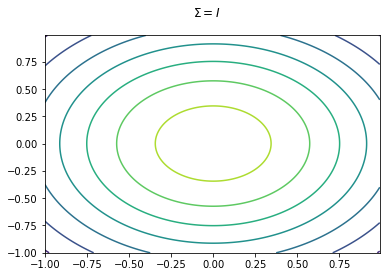

In [4]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(μ, I)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contour(x, y, rv.pdf(pos))
plt.suptitle(r'$\Sigma = I$')
plt.show()

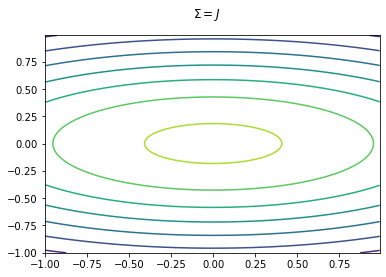

In [5]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(μ, J)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contour(x, y, rv.pdf(pos))
plt.suptitle(r'$\Sigma = J$')

plt.show()

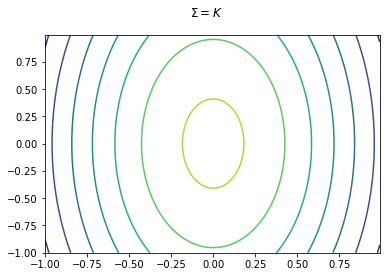

In [6]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(μ, K)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contour(x, y, rv.pdf(pos))
plt.suptitle(r'$\Sigma = K$')

plt.show()

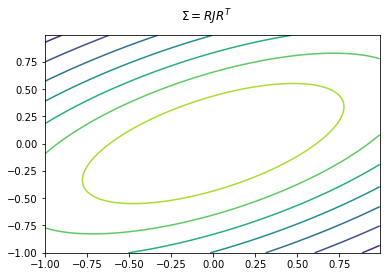

In [7]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(μ, R@J@R.T)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contour(x, y, rv.pdf(pos))
plt.suptitle(r'$\Sigma = RJR^T$')

plt.show()

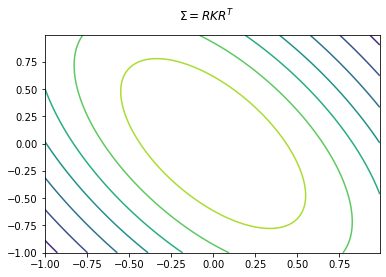

In [8]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(μ, R@K@R.T)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contour(x, y, rv.pdf(pos))
plt.suptitle(r'$\Sigma = RKR^T$')

plt.show()

## Exercise 3.10

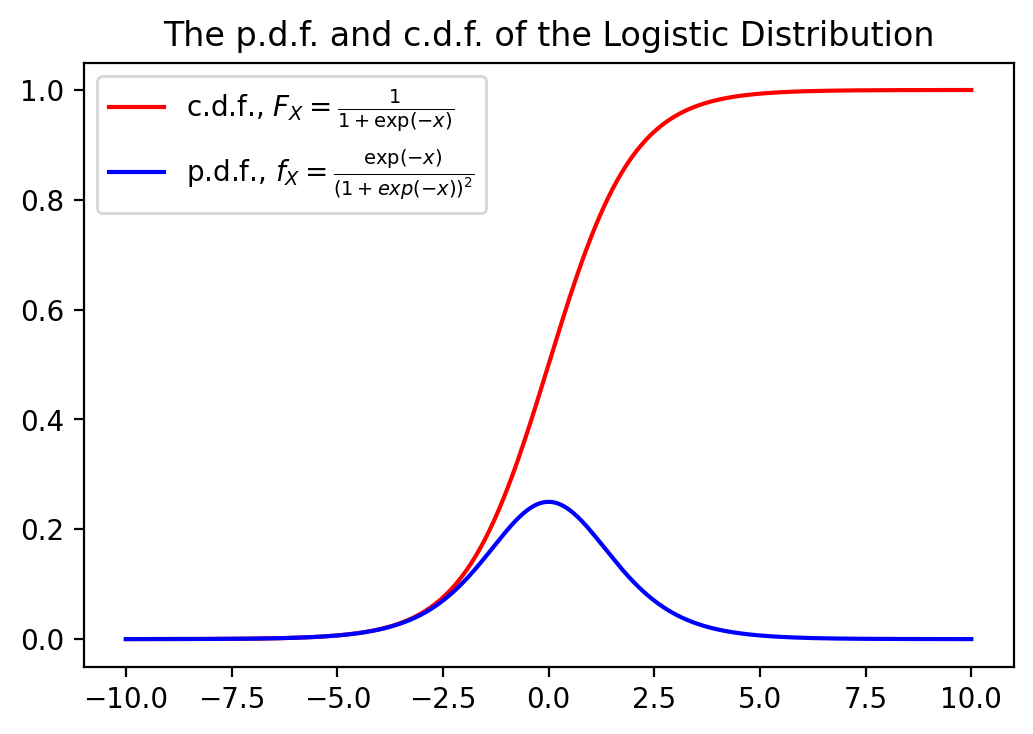

In [16]:
#the cdf of the distribution
def cdf(x):
    return 1/(1 + np.exp(-x))
#the pdf of the distribution
def pdf(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

#plotting domain
domain = np.linspace(-10, 10, int(1e6))


#set up figure
fig = plt.figure()
fig.set_dpi(200)
ax = fig.add_subplot(111)
#plot figure
ax.plot(domain, cdf(domain), 'r-', label=r'c.d.f., $F_X = \frac{1}{1 + \exp(-x)}$')
ax.plot(domain, pdf(domain), 'b-', label=r'p.d.f., $f_X = \frac{\exp(-x)}{(1 + exp(-x))^2}$')
ax.legend(loc='best')
ax.set_title(r'The p.d.f. and c.d.f. of the Logistic Distribution')
plt.show()

In [29]:
σ, τ, μ, ν, x, z = sy.symbols('sigma, tau, mu, nu, x, z')


expression = sy.exp((-τ**2*x**2 + 2*x*μ*τ**2 + 2*x*σ**2*z - σ**2*x**2 -2*x*σ**2*ν )/(2*σ**2*τ**2))

simplified = sy.simplify(expression)

integrated = sy.integrate(simplified, (x, -np.inf, np.inf))
display(integrated)
#display(sy.simplify(simplified))
#sy.latex(simplified)
#expr1 = 1/sy.sqrt(2*sy.pi * σ**2)*sy.exp(-(x-μ)**2/(2*σ**2))
#expr2 = 1/sy.sqrt(2*sy.pi*τ**2)*sy.exp(-(z - x - ν)**2/(2*τ**2))

#expr3 = sy.exp(-x**2/2)

#integrated = sy.integrate(expr3, (x, -np.inf, np.inf))

#display(integrated)

#integrand = sy.simplify(expr1*expr2)

#final = sy.simplify(sy.integrate(integrand, (x, -np.inf, np.inf)))

#final2 = sy.simplify(final)
#sy.latex(final2)

Piecewise((-sigma**2*tau**2*(-sqrt(2)*pi*mu*(1 - nu*sigma**2/(mu*tau**2))*(1 + sigma**2*z/(mu*tau**2*(1 - nu*sigma**2/(mu*tau**2))))*exp(mu**2*(1 - nu*sigma**2/(mu*tau**2))**2*(1 + sigma**2*z/(mu*tau**2*(1 - nu*sigma**2/(mu*tau**2))))**2/(2*sigma**2*(sigma**2/tau**2 + 1)))*erf(sqrt(2)*mu*(1 - nu*sigma**2/(mu*tau**2))*(1 + sigma**2*z/(mu*tau**2*(1 - nu*sigma**2/(mu*tau**2))))/(2*sigma*sqrt(polar_lift(sigma**2/tau**2 + 1))))/(2*sigma*sqrt(polar_lift(sigma**2/tau**2 + 1))) - sqrt(2)*pi*mu*(1 - nu*sigma**2/(mu*tau**2))*(1 + sigma**2*z/(mu*tau**2*(1 - nu*sigma**2/(mu*tau**2))))*exp(mu**2*(1 - nu*sigma**2/(mu*tau**2))**2*(1 + sigma**2*z/(mu*tau**2*(1 - nu*sigma**2/(mu*tau**2))))**2/(2*sigma**2*(sigma**2/tau**2 + 1)))/(2*sigma*sqrt(polar_lift(sigma**2/tau**2 + 1))))/(sqrt(pi)*(1 + sigma**2*z/(mu*tau**2*(1 - nu*sigma**2/(mu*tau**2))))*(mu*tau**2 - nu*sigma**2)) + sigma**2*tau**2*(-sqrt(2)*pi*nu*sigma*(1 - z/(nu*(-mu*tau**2/(nu*sigma**2) + 1)))*(-mu*tau**2/(nu*sigma**2) + 1)*exp(nu**2*sigma**2*